# Bike Sharing 

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Data Ingestion 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as ma

In [50]:
print(sns.__version__)

0.11.2


In [51]:
df = pd.read_csv("day.csv")

### Data Validation

In [52]:
#Reading the data
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [53]:
#Geting all the columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [54]:
#Viewing there types
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [55]:
#insfrence
#There is no catigorical colulmns in our data

In [56]:
#Knowing the shape
df.shape


(731, 16)

In [57]:
#infrence
#Total number of Rows : 731
#Total number of Columns : 16

In [58]:
#Checking for missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [59]:
#infrence
#There is no missing values in our dataset

In [60]:
#geting total unique values in all columns
df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [61]:
#infrence 
#wethersit column have only 3 unique vlaues but in the columns discription 4 were given 

In [62]:
#dividing columns into countinous and discreat values
countinous_columns = ["temp","atemp","hum","windspeed"]


### EDA

In [63]:
#for EDA purpous i would be replacing all mnth,weathersit,season,weekday into original catigorical values

In [64]:
#Replacing the season column
# season (1:springer, 2:summer, 3:fall, 4:winter)

In [65]:
df["season"].replace([1,2,3,4],["spring","summer","fall","winter"],inplace=True)

In [66]:
#checking the column

In [67]:
df["season"].value_counts()

fall      188
summer    184
spring    181
winter    178
Name: season, dtype: int64

In [68]:
#Replacing the weathersit column
# weathersit :
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy --> good
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist --> modrate
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds --> bad
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -- > seaver

In [69]:
df['weathersit'].replace([1,2,3],['good',"modrate","bad"],inplace = True)

In [70]:
#checking the column

In [71]:
df["weathersit"].value_counts()

good       463
modrate    247
bad         21
Name: weathersit, dtype: int64

In [72]:
#Replacing the mnth columns 

In [73]:
df["mnth"].replace({1:"jan",2:"feb",3:"mar",4:"apr",5:'may',6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"},inplace = True)

In [74]:
#checking the column

In [75]:
df["mnth"].value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    57
Name: mnth, dtype: int64

In [76]:
#Replacing the weekday columns 

In [77]:
df["weekday"].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

In [78]:
#Replacing all the values is done now we start the EDA

In [79]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<AxesSubplot:>

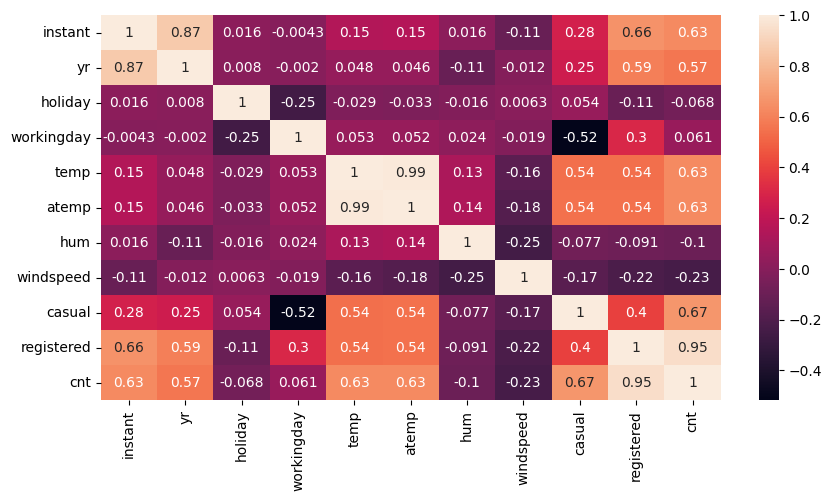

In [80]:
#Checking for correletion
cm = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cm , annot= True)

In [81]:
#infrence
#temp and atemp have very high correlation
#cnt and registered also have a high correlation

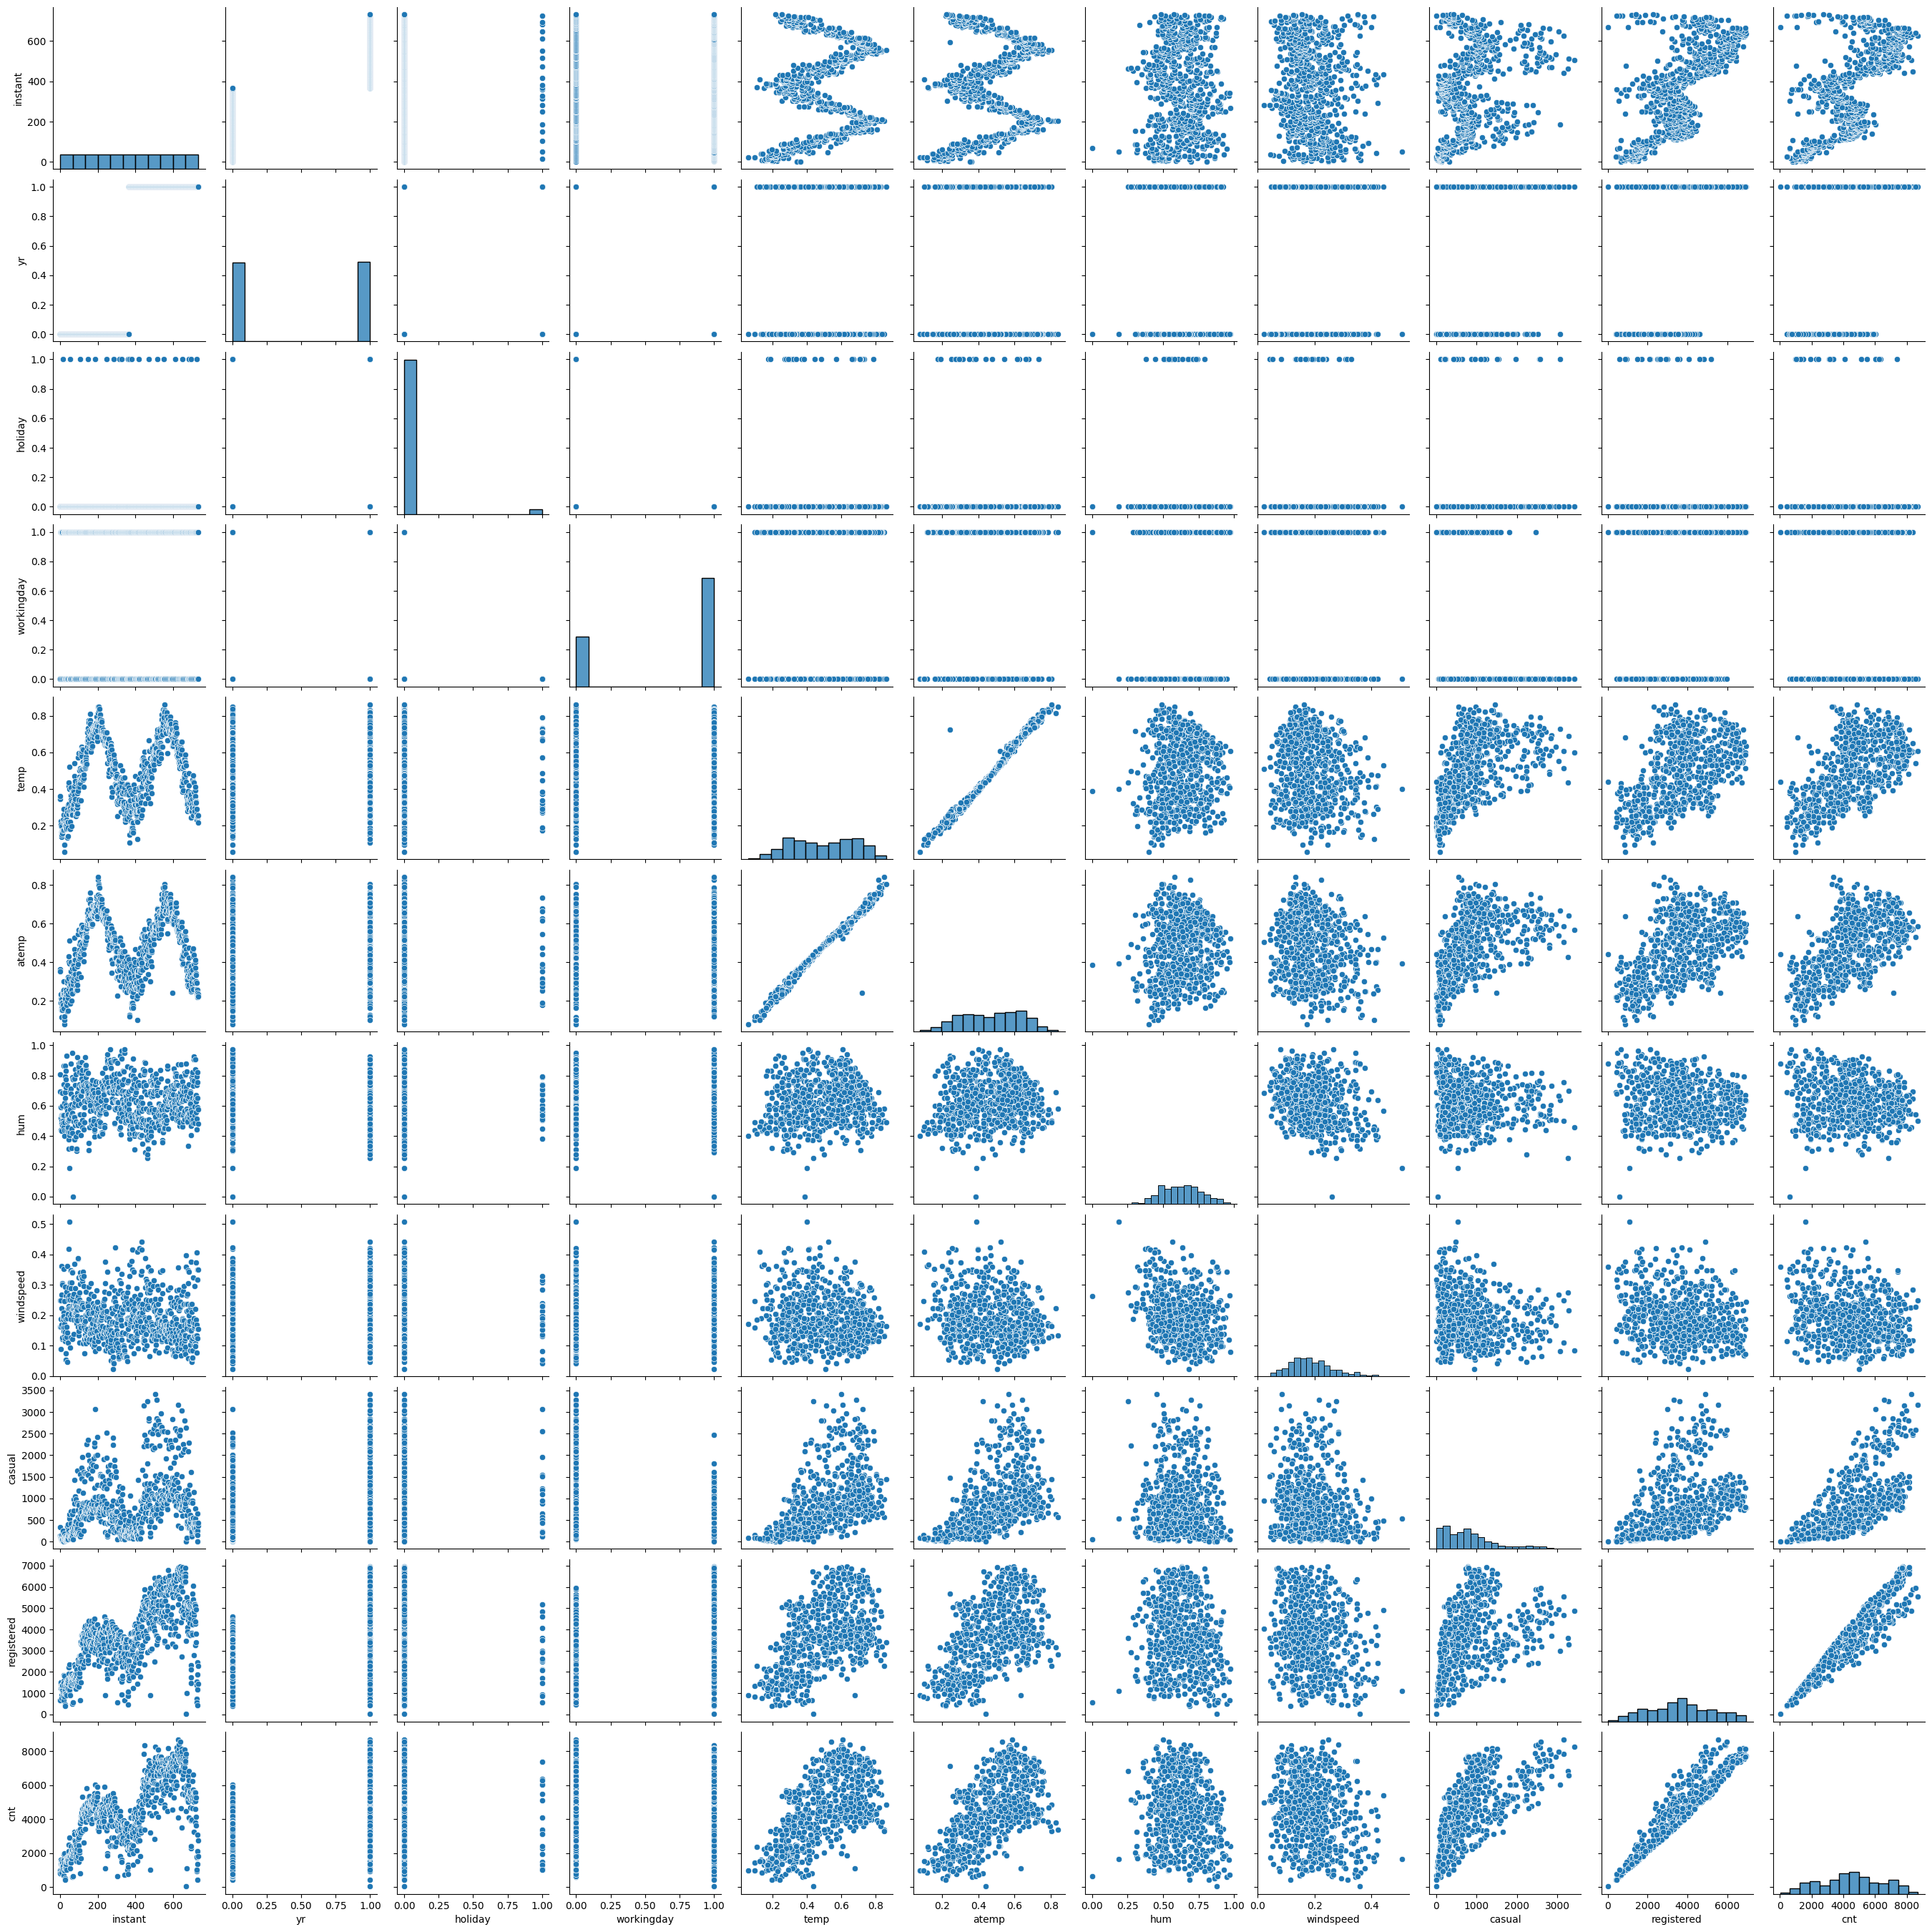

In [82]:
#ploting the pairplot to check the correlation and disturbtion 
sns.pairplot(df)

In [83]:
#infrence
#None of the columns follow a Normal distrubtion 
#The infrence we had from correlation heatmap hold true in as we can see the pairplot 

<AxesSubplot:>

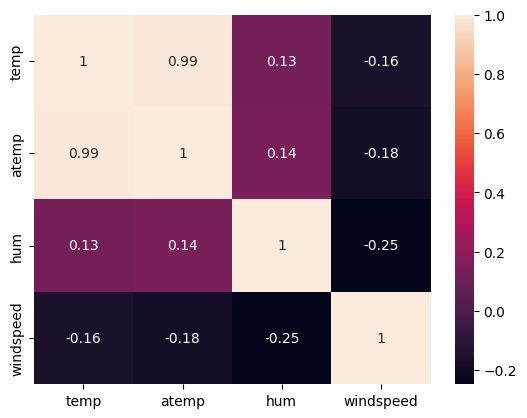

In [84]:
#seeing correlation for continous columns
cm_con = df[countinous_columns].corr()
sns.heatmap(cm_con,annot=True)

In [85]:
#infrence 
#None of them seem to be highly correlated except temp and atemp columns 

<AxesSubplot:xlabel='season', ylabel='Count'>

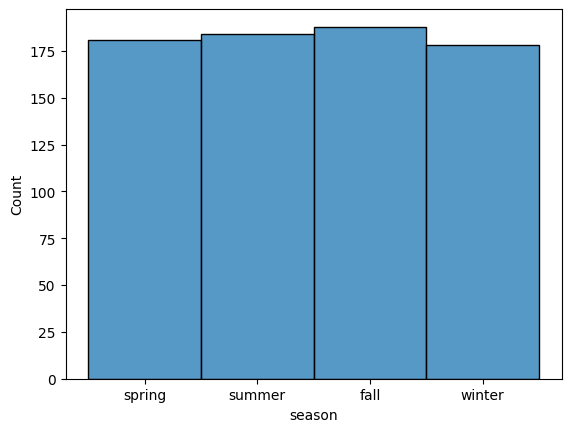

In [86]:
sns.histplot(df["season"])

In [87]:
#infrence 
#Each season have nearly equal number for data in our dataset

<AxesSubplot:xlabel='mnth', ylabel='Count'>

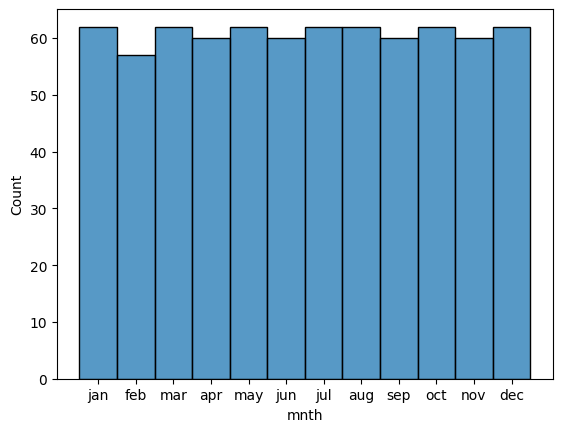

In [88]:
sns.histplot(df["mnth"])

In [89]:
#infrence 
#Each month have nearly equal number for data in our dataset

In [90]:
#ploting bar plot for catrigocial values to see demand

In [91]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,jan,0,sat,0,modrate,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,jan,0,sun,0,modrate,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,jan,0,mon,1,good,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,jan,0,tue,1,good,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,jan,0,wed,1,good,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [92]:
var_cat = ["season","mnth","weathersit","weekday","yr"]

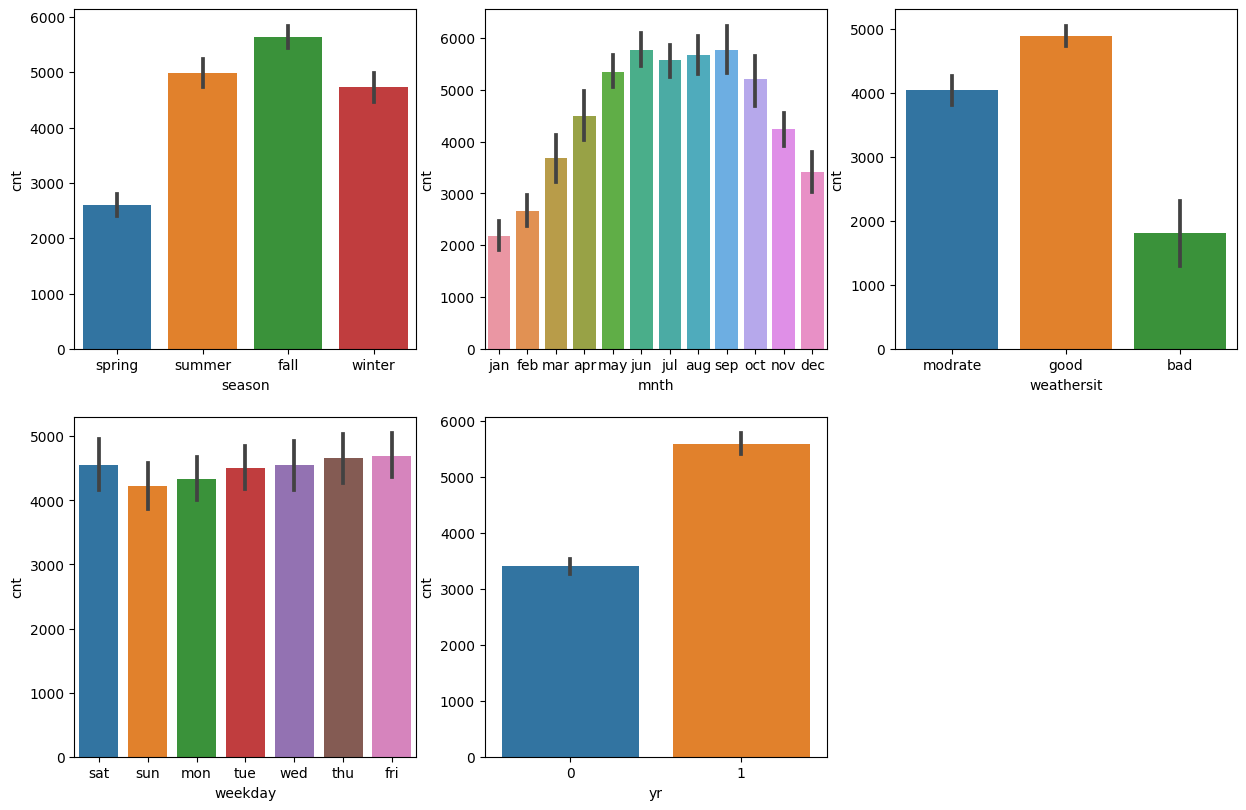

In [93]:
plt.figure(figsize=(15,15))
for index,value in enumerate(var_cat):
    plt.subplot(3,3,index+1)
    sns.barplot(data=df,x = value, y ="cnt" )


In [94]:
#infrence 
#1. Fall saw the most number of rental
#2. Yearly demand has grown 
#3. Number of rantal in weekday are mostly the same
#4. Having a bad weather condiction effect the rental
#5. Demand of rantal in monthly have grown till july and then got up and then went down on octuber and it continoues
#6. Jan saw the least amount of rantals and highest was Sep


In [95]:
#ploting the mnth and cnt with respect to year

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

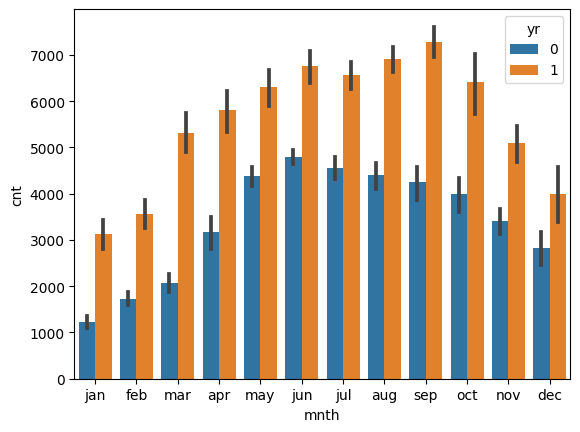

In [96]:
sns.barplot(data=df,x = "mnth", y = "cnt",hue="yr")

In [97]:
#infrence 
#Both year have a similear treand


In [98]:
#ploting with continous columns

c:\Users\KIIT\anaconda3\envs\bs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


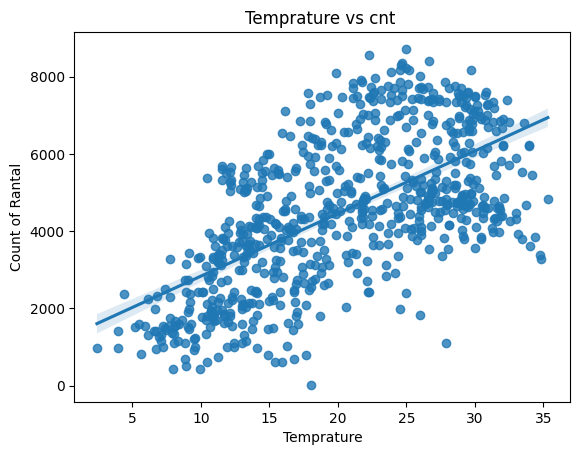

In [99]:
#Starting with temp
sns.regplot(df["temp"]*41,df["cnt"])
plt.xlabel("Temprature")
plt.ylabel("Count of Rantal")
plt.title("Temprature vs cnt ")
plt.show()


In [100]:
#infrence 
#They have a postitive correlation  


c:\Users\KIIT\anaconda3\envs\bs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


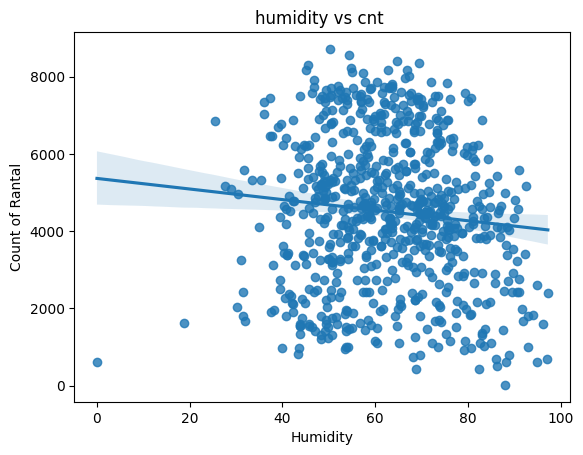

In [101]:
#Now hum
sns.regplot(df["hum"]*100,df["cnt"])
plt.xlabel("Humidity")
plt.ylabel("Count of Rantal")
plt.title("humidity vs cnt ")
plt.show()

In [102]:
#infrence 
#We see a little neagtive correlation 

c:\Users\KIIT\anaconda3\envs\bs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


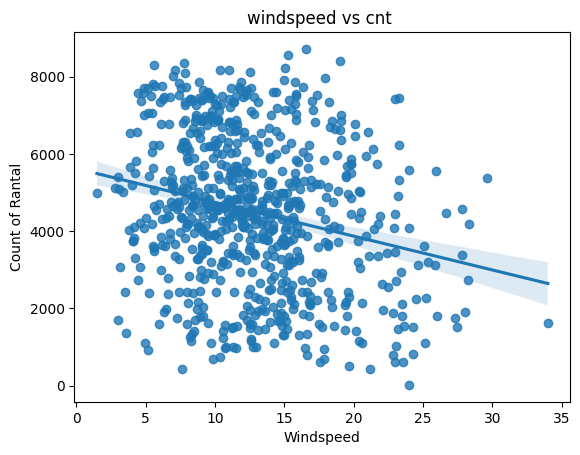

In [103]:
#Now windspeed
sns.regplot(df["windspeed"]*67,df["cnt"])
plt.xlabel("Windspeed")
plt.ylabel("Count of Rantal")
plt.title("windspeed vs cnt ")
plt.show()

In [104]:
#infrence 
#We see a negative correlation between windspeed and cnt 

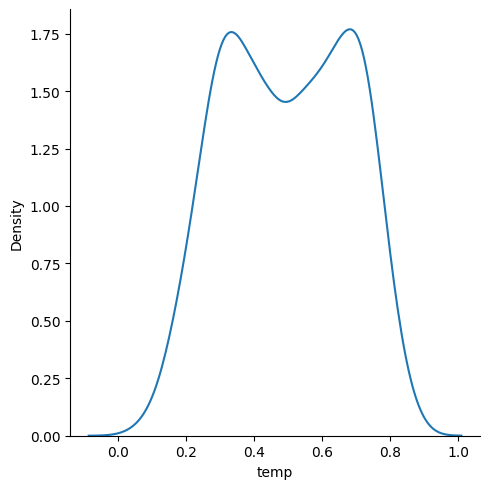

In [256]:
#checking the distrubtion of continous columns
sns.displot(df["temp"], kind="kde")

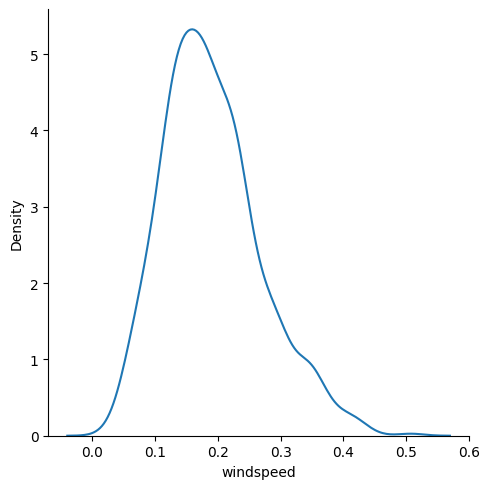

In [257]:
sns.displot(df["windspeed"], kind="kde")

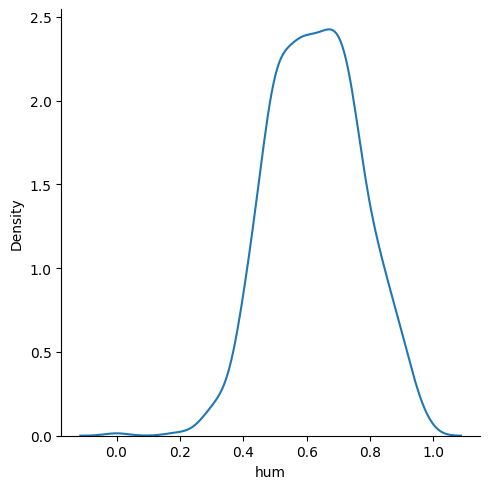

In [258]:
sns.displot(df["hum"], kind="kde")

### Data Transformation

In [118]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,jan,0,sat,0,modrate,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,jan,0,sun,0,modrate,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,jan,0,mon,1,good,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,jan,0,tue,1,good,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,jan,0,wed,1,good,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [126]:
#Encoading all catorigiacal columns

In [127]:
df = pd.get_dummies(data= df , columns= ["season","mnth","weekday"],drop_first= True)
df = pd.get_dummies(data = df , columns= ["weathersit"])

In [128]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_modrate
0,1,2011-01-01,0,0,0,0.344167,0.363625,0.805833,0.160446,331,...,0,0,1,0,0,0,0,0,0,1
1,2,2011-01-02,0,0,0,0.363478,0.353739,0.696087,0.248539,131,...,0,0,0,1,0,0,0,0,0,1
2,3,2011-01-03,0,0,1,0.196364,0.189405,0.437273,0.248309,120,...,0,1,0,0,0,0,0,0,1,0
3,4,2011-01-04,0,0,1,0.200000,0.212122,0.590435,0.160296,108,...,0,0,0,0,0,1,0,0,1,0
4,5,2011-01-05,0,0,1,0.226957,0.229270,0.436957,0.186900,82,...,0,0,0,0,0,0,1,0,1,0


In [129]:
df.shape

(731, 35)

In [151]:
#Droping instant,dtday,casual,registered
df.drop(columns=["instant","dteday","casual","registered"],axis=1,inplace= True)
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_modrate'],
      dtype='object')

In [173]:
#Spliting the data to X and y
X = df.drop("cnt", axis= 1)
Y = df["cnt"]

### Model Buiding 

##### Without Scaling 

In [202]:
#Spliting the data to test and train split 
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=56)
(X_train.shape,x_test.shape)


((511, 30), (220, 30))

In [203]:
Y_train.shape

(511,)

In [204]:
#as this is a regession problem 
#i would be importing all the regression algo and making comparission 

In [205]:
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [206]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score



def r2_adj(score,x_test,y_test):
    return 1 - (1-score)*(len(y_test)-1)/(len(y_test) - x_test.shape[1]-1)


In [207]:
lr = LogisticRegression()
ri = Ridge()
la = Lasso()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ad = AdaBoostRegressor()
gb = GradientBoostingRegressor()
svr = SVR()

In [208]:
models  = {"LogisticRegression" : lr , "Ridge" :  ri , "Lasso" : la , "DecisionTreeRegressor" : dt , "RandomForestRegressor" : rf , "AdaBoostRegressor" : ad, 
        "GradientBoostingRegressor" : gb, "SVR" : svr}
report = {"Models":[],"Training_score":[],"R-squred_score": [],"R-squred_adjusted":[],"Mean_absolute_error":[],"Mean_squared_error":[]}

In [209]:
def model_function(X_train,x_test,Y_train,y_test,model_list):
    for m in model_list:
        #insilize the model
        model = models[m]
        #fit the model
        model.fit(X_train,Y_train)
        #get the training score
        traing_score = model.score(X_train,Y_train)
        #get the prediction values
        y_pred = model.predict(x_test)
        #get r-squred score
        r2 = r2_score(y_test,y_pred)
        #get MAE
        mae = mean_absolute_error(y_test,y_pred)
        #get MSE
        mse = mean_squared_error(y_test,y_pred)
        #get r-squre adjusted
        r2_a = r2_adj(r2,x_test,y_test)
        #make the report
        report["Models"].append(m)
        report["Training_score"].append(traing_score)
        report["R-squred_score"].append(r2)
        report["R-squred_adjusted"].append(r2_a)
        report["Mean_absolute_error"].append(mae)
        report["Mean_squared_error"].append(mse)
    return pd.DataFrame(report)


        

In [210]:
model_function(X_train,x_test,Y_train,y_test,models)

,Models,Training_score,R-squred_score,R-squred_adjusted,Mean_absolute_error,Mean_squared_error
0,LogisticRegression,0.716243,0.489564,0.408542,1054.395455,1.975059e+06
1,Ridge,0.849871,0.825640,0.797964,621.489334,6.746616e+05
2,Lasso,0.851465,0.826629,0.799109,622.211632,6.708358e+05
3,DecisionTreeRegressor,1.000000,0.767401,0.730480,664.040909,9.000091e+05
4,RandomForestRegressor,0.980136,0.856794,0.834062,518.619045,5.541162e+05
5,AdaBoostRegressor,0.859326,0.788063,0.754422,682.857929,8.200610e+05
6,GradientBoostingRegressor,0.957464,0.877059,0.857544,496.052381,4.757030e+05
7,SVR,0.012829,-0.004021,-0.163389,1598.395069,3.884913e+06


In [191]:
#LogisticRegression,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor are Overfiting 
#Can choose Ridge or Lasso

#### With scalling

In [211]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
ms = MinMaxScaler()
rb = RobustScaler()

In [212]:
#with MInmaxScaler 
ms.fit(X_train[countinous_columns])
X_train[countinous_columns] = ms.transform(X_train[countinous_columns])
x_test[countinous_columns] = ms.transform(x_test[countinous_columns])

In [213]:

report = {"Models":[],"Training_score":[],"R-squred_score": [],"R-squred_adjusted":[],"Mean_absolute_error":[],"Mean_squared_error":[]}
model_function(X_train,x_test,Y_train,y_test,models)

,Models,Training_score,R-squred_score,R-squred_adjusted,Mean_absolute_error,Mean_squared_error
0,LogisticRegression,0.724070,0.453827,0.367133,1095.954545,2.113335e+06
1,Ridge,0.851099,0.825884,0.798247,624.597295,6.737154e+05
2,Lasso,0.851524,0.826527,0.798992,622.921071,6.712287e+05
3,DecisionTreeRegressor,1.000000,0.775648,0.740037,662.572727,8.680959e+05
4,RandomForestRegressor,0.978226,0.857502,0.834883,515.239091,5.513767e+05
5,AdaBoostRegressor,0.854866,0.778841,0.743736,700.350645,8.557432e+05
6,GradientBoostingRegressor,0.957464,0.877415,0.857957,495.822501,4.743264e+05
7,SVR,0.013427,-0.003518,-0.162807,1597.982462,3.882968e+06


In [214]:
#Same as before 

In [215]:
#with RobustScaler 
rb.fit(X_train[countinous_columns])
X_train[countinous_columns] = rb.transform(X_train[countinous_columns])
x_test[countinous_columns] = rb.transform(x_test[countinous_columns])

In [216]:
report = {"Models":[],"Training_score":[],"R-squred_score": [],"R-squred_adjusted":[],"Mean_absolute_error":[],"Mean_squared_error":[]}
model_function(X_train,x_test,Y_train,y_test,models)

,Models,Training_score,R-squred_score,R-squred_adjusted,Mean_absolute_error,Mean_squared_error
0,LogisticRegression,0.882583,0.451617,0.364572,1092.831818,2.121888e+06
1,Ridge,0.851492,0.826499,0.798960,623.400473,6.713354e+05
2,Lasso,0.851562,0.826688,0.799178,622.529017,6.706061e+05
3,DecisionTreeRegressor,1.000000,0.780996,0.746233,649.745455,8.474041e+05
4,RandomForestRegressor,0.980061,0.860237,0.838052,514.811773,5.407932e+05
5,AdaBoostRegressor,0.854508,0.776192,0.740667,705.512391,8.659928e+05
6,GradientBoostingRegressor,0.957464,0.877412,0.857954,495.685655,4.743346e+05
7,SVR,0.016795,-0.000336,-0.159120,1595.212580,3.870656e+06


In [219]:
#Conclusion 
#Without Scalling we are able to achive same accuracy as with Scalling that is because the data is aleardy scalled 
#But in prdiction pipline i would be using the Scalling coz there may come a data without scalled 
#For Model we can use Lasso or Ridge, i will go with Ridge

In [220]:
#using Grid Search cv for fine-tuining 

In [242]:
parameters = {"alpha":[i for i in range(1,11)]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(ri, parameters)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [243]:
clf.best_params_

{'alpha': 4}

In [244]:
ri_b =Ridge(alpha=4)
ri_b.fit(X_train,Y_train)
print(f"Train score is :{ri_b.score(X_train,Y_train)}")
print(f"R2 score : {r2_score(y_test,ri_b.predict(x_test))}")

Train score is :0.8501016661249106
R2 score : 0.8239308558928486


In [245]:
#No significant change in accuracy
#Will stick to alpha = 1

In [259]:
#Conclusion
#Scaling method : MinMax 
#Model : Ridge
